In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv('news_data.csv',encoding='utf8')

In [40]:
data

,ID,Post,Label
0,1,පාස්කු බෝම්බකරුවෙකු වූ ඊබ්‍රහිම්ගේ පුතෙකු සමගි...,0
1,2,"දමිතා, එළැඹෙන මැතිවරණයට සජබෙන් තරඟ කරනවාද?",0
2,3,CID මඟින් අත්අඩංගුවට ගත්තේ කැලණිය මහ ශිෂ්‍ය සං...,1
3,4,ව්‍යාජ කොරියානු භාෂා විභාග අයදුම්පත් ගූගල් පෝර...,0
4,5,අධිවේගී මාර්ගයේ සිදු වූ හඳුන්නෙත්තිගේ සුළු අනත...,1
...,...,...,...
332,333,ශ්‍රී ලංකාව දෙකඩ කර ඊලම හදන බව එංගලන්තය කියයි?,0
333,334,නව රජයේ අමාත්‍යංශ ලේකම්වරු ලෙස ත්‍රිවිධ හමුදා ...,0
334,335,ගාල්ල තල්පිටිය මුස්ලිම් පල්ලියට ප්‍රහාරයක් !,0
335,336,ගෝඨාභය රාජපක්ෂ මහතා දිල්කා සමන්මලී මාධ්‍යවේදින...,1


In [41]:
data.head()

,ID,Post,Label
0,1,පාස්කු බෝම්බකරුවෙකු වූ ඊබ්‍රහිම්ගේ පුතෙකු සමගි...,0
1,2,"දමිතා, එළැඹෙන මැතිවරණයට සජබෙන් තරඟ කරනවාද?",0
2,3,CID මඟින් අත්අඩංගුවට ගත්තේ කැලණිය මහ ශිෂ්‍ය සං...,1
3,4,ව්‍යාජ කොරියානු භාෂා විභාග අයදුම්පත් ගූගල් පෝර...,0
4,5,අධිවේගී මාර්ගයේ සිදු වූ හඳුන්නෙත්තිගේ සුළු අනත...,1


In [42]:
data.shape


(337, 3)

In [43]:
data.duplicated().sum()


0

In [44]:
data.isnull().sum()


ID       0
Post     0
Label    0
dtype: int64

In [45]:
import re
import string

In [46]:
data["Post"].head(5)

0    පාස්කු බෝම්බකරුවෙකු වූ ඊබ්‍රහිම්ගේ පුතෙකු සමගි...
1           දමිතා, එළැඹෙන මැතිවරණයට සජබෙන් තරඟ කරනවාද?
2    CID මඟින් අත්අඩංගුවට ගත්තේ කැලණිය මහ ශිෂ්‍ය සං...
3    ව්‍යාජ කොරියානු භාෂා විභාග අයදුම්පත් ගූගල් පෝර...
4    අධිවේගී මාර්ගයේ සිදු වූ හඳුන්නෙත්තිගේ සුළු අනත...
Name: Post, dtype: object

In [47]:
data["Post"] = data["Post"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [48]:
data["Post"].head(5)

0    පාස්කු බෝම්බකරුවෙකු වූ ඊබ්‍රහිම්ගේ පුතෙකු සමගි...
1           දමිතා, එළැඹෙන මැතිවරණයට සජබෙන් තරඟ කරනවාද?
2    cid මඟින් අත්අඩංගුවට ගත්තේ කැලණිය මහ ශිෂ්‍ය සං...
3    ව්‍යාජ කොරියානු භාෂා විභාග අයදුම්පත් ගූගල් පෝර...
4    අධිවේගී මාර්ගයේ සිදු වූ හඳුන්නෙත්තිගේ සුළු අනත...
Name: Post, dtype: object

In [49]:
data["Post"] = data['Post'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [50]:
data["Post"].head(5)

0    පාස්කු බෝම්බකරුවෙකු වූ ඊබ්‍රහිම්ගේ පුතෙකු සමගි...
1           දමිතා, එළැඹෙන මැතිවරණයට සජබෙන් තරඟ කරනවාද?
2    cid මඟින් අත්අඩංගුවට ගත්තේ කැලණිය මහ ශිෂ්‍ය සං...
3    ව්‍යාජ කොරියානු භාෂා විභාග අයදුම්පත් ගූගල් පෝර...
4    අධිවේගී මාර්ගයේ සිදු වූ හඳුන්නෙත්තිගේ සුළු අනත...
Name: Post, dtype: object

In [51]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["Post"] = data["Post"].apply(remove_punctuations)

In [53]:
data["Post"].tail(10)

327    කුසල් මෙන්ඩිස් වෙනුවෙන් සමඟි ජන බලවේගයේ උද්ඝෝෂ...
328    “කරුගේ කතාවට සුමන්තිරන් කිපෙයි” යන සිරස්තලය යට...
329    හමුදාපතිගේ සේවා දිගුව සම්බන්ධයෙන් බිමල් රත්නාය...
330    විශ්‍රාම වැටුප ලබා ගන්න පාර්ලිමේන්තුව නැවත කැඳ...
331    රනිල් වික්‍රමසිංහ ඇමරිකානු හා ඉන්දියානු ගැත්තෙ...
332        ශ්‍රී ලංකාව දෙකඩ කර ඊලම හදන බව එංගලන්තය කියයි
333    නව රජයේ අමාත්‍යංශ ලේකම්වරු ලෙස ත්‍රිවිධ හමුදා ...
334          ගාල්ල තල්පිටිය මුස්ලිම් පල්ලියට ප්‍රහාරයක් 
335    ගෝඨාභය රාජපක්ෂ මහතා දිල්කා සමන්මලී මාධ්‍යවේදින...
336    ගෝඨාභය රාජපක්ෂට අවුරුදු විස්සක් රට පාලනය කිරීම...
Name: Post, dtype: object

In [54]:
data["Post"] = data['Post'].str.replace('\d+', '', regex=True)

In [55]:
data["Post"].head()

0    පාස්කු බෝම්බකරුවෙකු වූ ඊබ්‍රහිම්ගේ පුතෙකු සමගි...
1             දමිතා එළැඹෙන මැතිවරණයට සජබෙන් තරඟ කරනවාද
2    cid මඟින් අත්අඩංගුවට ගත්තේ කැලණිය මහ ශිෂ්‍ය සං...
3    ව්‍යාජ කොරියානු භාෂා විභාග අයදුම්පත් ගූගල් පෝර...
4    අධිවේගී මාර්ගයේ සිදු වූ හඳුන්නෙත්තිගේ සුළු අනත...
Name: Post, dtype: object

In [56]:
import io
#getting the stop words
f_stopWords = io.open("StopWords_425.txt", mode="r", encoding="utf-16")
sinhala_stop_words = []
df_StopWordsRemoval_Sinhala = pd.DataFrame(columns=['Post', 'Label'])

for x in f_stopWords:
  sinhala_stop_words.append(x.split()[0])

In [57]:
sinhala_stop_words

['ද',
 'ය',
 'මේ',
 'ඒ',
 'හා',
 'ම',
 'බව',
 'නම්',
 'දී',
 'සඳහා',
 'යි',
 'සහ',
 'ලෙස',
 'හෝ',
 'ඇත',
 'නිසා',
 'මෙම',
 'ව',
 'ගැන',
 'විසින්',
 'විට',
 'එම',
 'තුළ',
 'කොට',
 'යුතු',
 'වශයෙන්',
 'නො',
 'පිළිබඳ',
 'අනුව',
 'එහෙත්',
 'පසු',
 'එක්',
 'මෙන්',
 'සිට',
 'නැත',
 'වැනි',
 'නෑ',
 'වඩා',
 'බොහෝ',
 'ඉතා',
 'නැහැ',
 'තවත්',
 'බවට',
 'පමණක්',
 'යම්',
 'සමඟ',
 'මත',
 'සේ',
 'නමුත්',
 'පෙර',
 'මහා',
 'වෙත',
 'පමණ',
 'සමග',
 'නොවේ',
 'මගින්',
 'දක්වා',
 'නොව',
 'සියලු',
 'යැයි',
 'ඇතැම්',
 'යනු',
 'වෙනත්',
 'හැම',
 'පිණිස',
 'පටන්',
 'සහිත',
 'හරි',
 'ඇතුළු',
 'වගේ',
 'පරිදි',
 'පවා',
 'තව',
 'සමහර',
 'තමයි',
 'පසුව',
 'සෑම',
 'යටතේ',
 'වෙනුවෙන්',
 'එනම්',
 'ඒත්',
 'වෙන',
 'බැවින්',
 'පහළ',
 'වඩාත්',
 'හැර',
 'පිට',
 'එවැනි',
 'කිසි',
 'ආ',
 'ඉහළ',
 'අනෙක්',
 'තුළින්',
 'එක්ක',
 'ආදී',
 'මුළු',
 'පැවති',
 'සම්බන්ධයෙන්',
 'ඔය',
 'වත්',
 'පමණි',
 'වෙන්',
 'පුරා',
 'ඕනෑ',
 'එපා',
 'එවිට',
 'හෙවත්',
 'යනුවෙන්',
 'මෙවැනි',
 'ඔව්',
 'ඉතින්',
 'ටික',
 'ඉහත',
 'කරා',
 'කිසියම්',
 'ඇයි',
 

In [58]:
data["Post"] = data["Post"].apply(lambda x: " ".join(x for x in x.split() if x not in sinhala_stop_words))

In [59]:
data["Post"].head()

0    පාස්කු බෝම්බකරුවෙකු වූ ඊබ්‍රහිම්ගේ පුතෙකු අනුර...
1             දමිතා එළැඹෙන මැතිවරණයට සජබෙන් තරඟ කරනවාද
2    cid අත්අඩංගුවට ගත්තේ කැලණිය මහ ශිෂ්‍ය සංගමයේ ක...
3    ව්‍යාජ කොරියානු භාෂා විභාග අයදුම්පත් ගූගල් පෝර...
4    අධිවේගී මාර්ගයේ සිදු වූ හඳුන්නෙත්තිගේ සුළු අනත...
Name: Post, dtype: object

In [60]:
from collections import Counter
vocab = Counter()

In [61]:
for sentence in data['Post']:
    vocab.update(sentence.split())

In [62]:
len(vocab)

1952

In [63]:
data.shape

(337, 3)

In [64]:
vocab

Counter({'පාස්කු': 4,
         'බෝම්බකරුවෙකු': 1,
         'වූ': 13,
         'ඊබ්\u200dරහිම්ගේ': 1,
         'පුතෙකු': 1,
         'අනුර': 15,
         'කුමාර': 10,
         'දිසානායක': 4,
         'සිටින': 7,
         'හුවමාරු': 10,
         'වන': 18,
         'ඡායාරූපයේ': 1,
         'ඇත්ත': 1,
         'කතාව': 2,
         'දමිතා': 2,
         'එළැඹෙන': 3,
         'මැතිවරණයට': 2,
         'සජබෙන්': 2,
         'තරඟ': 3,
         'කරනවාද': 1,
         'cid': 2,
         'අත්අඩංගුවට': 3,
         'ගත්තේ': 2,
         'කැලණිය': 1,
         'මහ': 3,
         'ශිෂ්\u200dය': 1,
         'සංගමයේ': 1,
         'කැඳවුම්කරු': 1,
         'කැලුම්': 1,
         'සංගමයේම': 1,
         'ක්\u200dරියාකාරිකයෙක්': 1,
         'ව්\u200dයාජ': 20,
         'කොරියානු': 1,
         'භාෂා': 1,
         'විභාග': 1,
         'අයදුම්පත්': 1,
         'ගූගල්': 1,
         'පෝරමය': 1,
         'ප්\u200dරවේසම්': 1,
         'වන්න': 1,
         'අධිවේගී': 1,
         'මාර්ගයේ': 2,
         'සිදු': 11,
         '

In [65]:
tokens = [key for key in vocab if vocab[key] > 2]

In [66]:
len(tokens)

238

In [67]:
tokens

['පාස්කු',
 'වූ',
 'අනුර',
 'කුමාර',
 'දිසානායක',
 'සිටින',
 'හුවමාරු',
 'වන',
 'එළැඹෙන',
 'තරඟ',
 'අත්අඩංගුවට',
 'මහ',
 'ව්\u200dයාජ',
 'සිදු',
 'සුළු',
 'ට',
 'මාධ්\u200dය',
 'කර',
 'ඇති',
 'පළවන',
 'පුවත්',
 'අසත්\u200dයයි',
 'ප්\u200dරකාශයක්',
 'කළා',
 'ගාල්ල',
 'කර්මාන්ත',
 'නිල',
 'මාලිමා',
 'වාර්තා',
 'මාලිමාවට',
 'සම්බන්ධ',
 'පාසල්',
 'රත්නායක',
 'ජනතා',
 'වී',
 'තීරණයක්',
 'විපක්ෂ',
 'නායක',
 'සජිත්',
 'උපහාසාත්මක',
 'සටහන්',
 'නායකයින්',
 'අසත්\u200dය',
 'පෙළක්',
 'සනත්',
 'නිශාන්තගේ',
 'බිමල්',
 'ට්විටර්',
 'පණිවිඩයක්',
 'අවස්ථාවක්',
 'රාජ්\u200dය',
 'ලබන',
 'පත්',
 'කිරීම',
 'ප්\u200dරකාශ',
 'ගත්',
 'ජනාධිපති',
 'ජාතික',
 'ජන',
 'බලවේගය',
 'සිදුකර',
 'ලබා',
 'දෙන',
 'පළ',
 'වලට',
 'වෛද්\u200dය',
 'නලින්ද',
 'ජයතිස්ස',
 'නොමැත',
 'ශ්\u200dරී',
 'ලංකා',
 'ක්\u200dරිකට්',
 'බලවේගයේ',
 'සිදුකළ',
 'නොමඟ',
 'යවන',
 'mcc',
 'දැඩි',
 'ප්\u200dරතිකාර',
 'හැකි',
 'දින',
 'ක්',
 'එල්ල',
 'කරන',
 'රනිල්',
 'ජවිපෙ',
 'එක්සත්',
 'වික්\u200dරමසිංහ',
 'මහතා',
 'ඉන්දියාවේ',
 'විමුක්ති',
 'ප

In [68]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, 'vocabulary.txt')

In [69]:
X = data['Post']
y = data['Label']

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [71]:
X_train

198    පරාජිතයින් පරිසරවේදීන් පැමිණිය හැක පුවරුවක් සජ...
181    අනුරකුමාර සමන්රත්නප්‍රිය රාත්‍රී සමාජ ශාලාවක හ...
152    මෙරට එන්නත්කරණයේ කොටසකට වතුර එන්නත් කරන බවක් බ...
52          පළාත් පාලන ඡන්දයේ නාමයෝජනා සියල්ල අවලංගු කළා
57     බැලුනයක් මාලිමාව සිදුකරන නවතම මැතිවරණ ප්‍රචාරණ...
                             ...                        
102    time සඟරාවේ ප්‍රධාන කවරයේ ගෝඨාභය රාජපක්ෂ ලෝකයේ...
54     “සිංහලයා පැරදවිය හැක්කේ සජිත්ට ඡන්දය දුන්නොත් ...
323    හිටපු ජනාධිපති රණසිංහ ප්‍රේමදාස මහතා මරාගෙන මැ...
129    ශ්‍රී ලාංකික පුරුෂයන්ට ස්ත්‍රීන් දෙදෙනෙකු විවා...
160    බිමල් රත්නායකගේ නිවසේ ළමා මෙහෙකාරියක් සිටි පළ ...
Name: Post, Length: 269, dtype: object

In [72]:
X_test

193    නාමල් රාජපක්ෂගේ බලපෑමෙන් ශ්‍රී ලංකන් ගුවන් සේව...
28     එක්සත් ජාතින්ගේ මණ්ඩලයේ ජනාධිපති රනිල් වික්‍රම...
306    දුම්රිය බස් සීසන් අවලංගු කළ දුමින්ද නාගමුවගේ ප...
187    මිනිස්සූ දාහක් දෙදෙහාක් මැරුණට ප්‍රශ්නේ ජොන්ස්...
241    ලේ පැල්ලම් ස්ටිකර ඇලවු කමිස පැළඳ විපක්ෂ මන්ත්‍...
                             ...                        
35     පාර්ලිමේන්තු මන්ත්‍රීවරියන් නවසීලන්තයේ සංචාරයක...
317    නාමල්ගේ අමාත්‍යාංශයේ පිරිසක් අයථා ක්‍රියා පිළි...
243    ජනාධිපති ගෝඨාභය රාජපක්ෂ මහතා පරිහරණය කරන බෙන්ස...
196                හදිසි මරණ පරීක්ෂක මුස්ලිම් නව තනතුරක්
223    මහජන ආරක්ෂක අමාත්‍ය ආචාර්ය සරත් වීරසේකර මහතා අ...
Name: Post, Length: 68, dtype: object

In [73]:
y_train

198    0
181    0
152    1
52     0
57     0
      ..
102    0
54     0
323    0
129    0
160    0
Name: Label, Length: 269, dtype: int64

In [74]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [75]:
vectorized_x_train = vectorizer(X_train, tokens)

In [76]:
vectorized_x_test = vectorizer(X_test, tokens)

In [77]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [78]:
y_train

198    0
181    0
152    1
52     0
57     0
      ..
102    0
54     0
323    0
129    0
160    0
Name: Label, Length: 269, dtype: int64

In [79]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [80]:
y_test

193    0
28     0
306    0
187    1
241    0
      ..
35     1
317    0
243    1
196    0
223    1
Name: Label, Length: 68, dtype: int64

In [81]:
y_train.value_counts()

0    189
1     80
Name: Label, dtype: int64

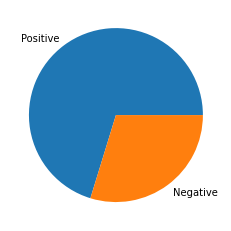

In [82]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [83]:
# !pip install imbalanced-learn

In [84]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(378, 238) (378,)


In [85]:
y_train_smote.value_counts()

0    189
1    189
Name: Label, dtype: int64

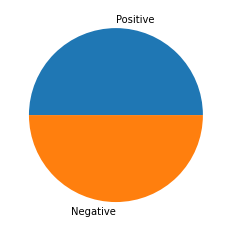

In [86]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [87]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [88]:
y_train_smote

0      0
1      0
2      1
3      0
4      0
      ..
373    1
374    1
375    1
376    1
377    1
Name: Label, Length: 378, dtype: int64

In [89]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [90]:
y_test

193    0
28     0
306    0
187    1
241    0
      ..
35     1
317    0
243    1
196    0
223    1
Name: Label, Length: 68, dtype: int64

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [92]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [93]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.942
	Precision = 0.956
	Recall = 0.926
	F1-Score = 0.941
Testing Scores:
	Accuracy = 0.721
	Precision = 0.625
	Recall = 0.6
	F1-Score = 0.612


In [94]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.873
	Precision = 0.854
	Recall = 0.899
	F1-Score = 0.876
Testing Scores:
	Accuracy = 0.721
	Precision = 0.615
	Recall = 0.64
	F1-Score = 0.627


In [95]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.987
	Precision = 1.0
	Recall = 0.974
	F1-Score = 0.987
Testing Scores:
	Accuracy = 0.647
	Precision = 0.526
	Recall = 0.4
	F1-Score = 0.455


In [96]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.987
	Precision = 0.995
	Recall = 0.979
	F1-Score = 0.987
Testing Scores:
	Accuracy = 0.75
	Precision = 0.722
	Recall = 0.52
	F1-Score = 0.605


In [97]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.955
	Precision = 0.93
	Recall = 0.984
	F1-Score = 0.956
Testing Scores:
	Accuracy = 0.603
	Precision = 0.4
	Recall = 0.16
	F1-Score = 0.229


In [98]:
import pickle

with open('model.pickle_rf_2', 'wb') as file:
    pickle.dump(rf, file)